# Logistic Regression

## We will implement a gradient descent optimizer to tune a logistic regression model that labels fish as either one species or the other.


In [26]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import csv
import math
# this line plots graphs in line
%matplotlib inline

### Exercise 1:

### 1. Plot the below univariate quadratic function ($0.0 < x < 4.0$)
##        $$f(x) = x^2 - 4x + 3$$
### 2. Compute the derivative wrt $x $ 
### 3. Implement the gradient descent algorithm to find the value of $x$ that minimizes $f(x)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

In [27]:
x = np.linspace(0.,4.,50)
def GraphfOfX(x):
    fOfX = x**2 -(4*x) + 3
    return fOfX
#fOfx = (math.pow(x,2)) - (4*x) + 3


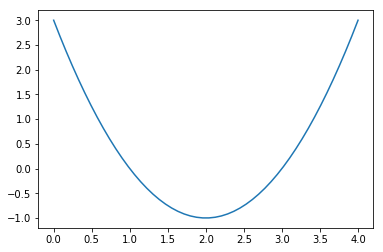

In [28]:
fOfX = GraphfOfX(x)
plt.plot(x,fOfX)
plt.show()

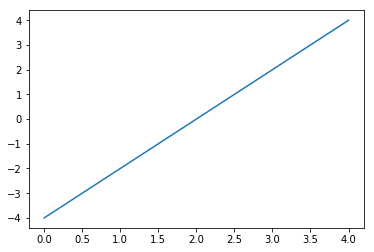

In [29]:
dfdx = 2*x - 4
plt.plot(x,dfdx)

In [30]:
alpha = 0.1
newX = np.zeros(55)
newX[0] = 0.5
i = 0
for i in range(55):
    newX[i] = (newX[i-1] - (alpha*((2*newX[i-1])-4)))
newY = GraphfOfX(newX)
print (newY)



[ 1.56        0.6384      0.048576   -0.32891136 -0.57050327 -0.72512209
 -0.82407814 -0.88741001 -0.92794241 -0.95388314 -0.97048521 -0.98111053
 -0.98791074 -0.99226287 -0.99504824 -0.99683087 -0.99797176 -0.99870193
 -0.99916923 -0.99946831 -0.99965972 -0.99978222 -0.99986062 -0.9999108
 -0.99994291 -0.99996346 -0.99997662 -0.99998503 -0.99999042 -0.99999387
 -0.99999608 -0.99999749 -0.99999839 -0.99999897 -0.99999934 -0.99999958
 -0.99999973 -0.99999983 -0.99999989 -0.99999993 -0.99999995 -0.99999997
 -0.99999998 -0.99999999 -0.99999999 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        ]


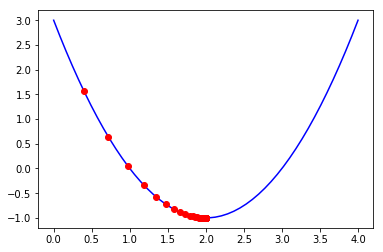

In [31]:
plt.plot(x,fOfX,'b',newX,newY,'ro')
plt.show()

### Exercise 2:

### 1. Plot the below bi-variate quadratic function on a 3D wireframe graph.
##  $$f(x,y) = x^2 + y^2 + 1$$
### for $-20.0 < x < 20.0$ and $-20.0<y<20.0$
### 2. Compute the partial derivatives wrt $x$ and $y$
### 3. Implement the gradient descent algorithm to find the value of $(x,y)$ that minimizes $f(x,y)$ 
### 4. Superimpose the gradient descent iterations on the graph in (1) 

In [32]:
def f(x,y,a,b,c):
    return a*x**2.0 + b*y**2.0 + c

N = 15
x = np.linspace(-20.,20.,N)
y = np.linspace(-20.,20.,N)

X = np.repeat(x,N).reshape(N,N)

Y = np.tile(y,N).reshape(N,N)

In [33]:
partialOfX = (2*x) + y**2 
partialOfY = x**2 + (2*y) 

## A system measures the width and length in centimetres of two fish species, spnott and awrat.  The results are given in a csv (comma separated) text file. In this assignment you will develop a linear discriminant function and a logistic regressor that model the data. 



## We first load the dataset and print the first 10 entries.  The length is given in the 1st column, the width is given in the second column and the species is given in the third column.


In [34]:
# DO NOT MODIFY THIS CELL
with open('Fish_Dataset_2019.csv', 'r') as f:
#with open('Fish_Dataset_2019.csv', 'rbU') as f:
    reader = csv.reader(f)
    data_=[]
    for i,row in enumerate(reader):
        if i==0: 
            print (row)
        else:
            data_.append(row)
data = np.array(data_,dtype=float)
data[0:10]

['Length', ' Width', ' Class(0=spnott', ' 1=awrat)']


array([[30.49,  9.4 ,  0.  ],
       [17.87,  5.62,  1.  ],
       [22.52,  5.56,  0.  ],
       [27.95, 10.55,  1.  ],
       [36.75, 10.49,  0.  ],
       [32.27, 13.06,  1.  ],
       [26.06,  8.16,  0.  ],
       [19.94,  6.4 ,  1.  ],
       [25.89,  8.5 ,  0.  ],
       [29.96, 11.56,  1.  ]])

# Graded Questions below [max marks = 100]

## What is the size of the dataset and the class distribution?


In [35]:
print('size of dataset  = ', data[:,2].size)
print('number of spnott = ', sum(data[:,2]==0))
print('number of awrat  = ', sum(data[:,2]==1))

('size of dataset  = ', 240)
('number of spnott = ', 120)
('number of awrat  = ', 120)


## Plot a scatter-plot that depicts spnott as a blue dot and awrat as a red dot. As you will see we have to use both input variables, since any variable on its own does not provide enough discrimination power. [5 marks]


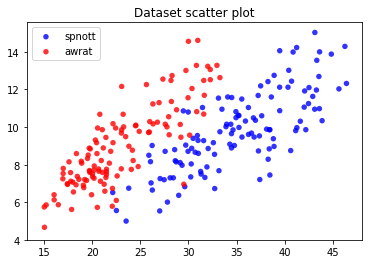

In [36]:
def plot_scatter(data):
    spnott_data = data[data[:,2]==0][:,0:2]
    awrat_data = data[data[:,2]==1][:,0:2]
    plot_data = (spnott_data, awrat_data)
    colors = ("blue", "red")
    groups = ("spnott", "awrat")

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
 
    for plot_data, color, group in zip(plot_data, colors, groups):
        ax.scatter(plot_data[:,0], plot_data[:,1], alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.title('Dataset scatter plot')
    plt.legend(loc=2)
    plt.show()

plot_scatter(data)

## Comment on whether the two input variables are correlated. [5 marks]


Clearly the two input variables are correlated. since each input variable independently has a high correlation with the output variable, they're also correlated with each other, possibly even more strongly. It can also been seen that the classification model two discriminate between the two classes is highly linear, which also implies a high amount of correlation between the input variable.

## We will now split the dataset into two parts. One part is called the training set and the other part is called the test set.


In [37]:
# DO NOT MODIFY THIS CELL
train_split = int(len(data)*0.7)
print('Split dataset at ', train_split)
d_train=np.array(data[0:train_split,:])
d_test = np.array(data[train_split:,:])
print('Shape of train = ',np.shape(d_train))
print('Shape of test = ',np.shape(d_test))

('Split dataset at ', 168)
('Shape of train = ', (168L, 3L))
('Shape of test = ', (72L, 3L))


## Plot a scatter-plot for the training set and on the same plot add a green line that separates the two classes.  Manually, vary the gradient and intercept coefficient to minimize the overall classification error. [10 marks]


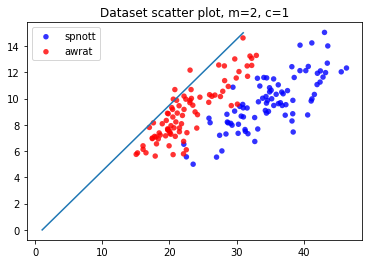

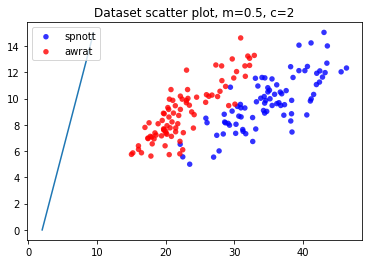

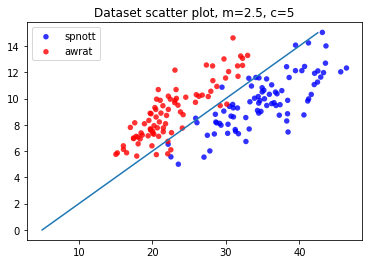

In [38]:
def plot_scatter_with_line(data,m,c):
    spnott_data = data[data[:,2]==0][:,0:2]
    awrat_data = data[data[:,2]==1][:,0:2]
    plot_data = (spnott_data, awrat_data)
    colors = ("blue", "red")
    groups = ("spnott", "awrat")

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
 
    for plot_data, color, group in zip(plot_data, colors, groups):
        ax.scatter(plot_data[:,0], plot_data[:,1], alpha=0.8, c=color, edgecolors='none', s=30, label=group)
        
    x = np.linspace(0.,15.,500)
    plt.plot(m*x + c,x)

    plt.title('Dataset scatter plot, m={}, c={}'.format(m, c))
    plt.legend(loc=2)
    plt.show()
    
plot_scatter_with_line(d_train, 2, 1)
plot_scatter_with_line(d_train, 0.5, 2)
plot_scatter_with_line(d_train, 2.5, 5)

Clearly the last plot has a much lower classification error as compare to the first two.

In [39]:
X_train = d_train[:,0:2]

Y_train = np.zeros((d_train[:,2].size,2))
Y_train[d_train[:,2]==0] = [1., 0.]
Y_train[d_train[:,2]==1] = [0., 1.]



## Develop a vectorised function to predict the class given the weights for a linear descision boundary and the input features for a dataset. [10 marks]

In [40]:
def predict_y(W, X):
    """
    W = Weight vector
    X = Input features
    """
    n, d = X.shape
    X_aug = np.hstack((X, np.ones((n, 1))))
    scores = np.dot(W, X_aug.T)
    Y_pred = (scores >= 0).astype(np.int)
    
    return scores.T, Y_pred

# Sample input values
W = np.array([3, 5, 9])
X = np.array([[2, 3],
              [3, 4],
              [4, 5],
              [7, 1]])
scores, Y_pred = predict_y(W, X)
print(Y_pred)

[1 1 1 1]


## Develop a function to calculate the error, given the predicted values and the dataset (complete with gold labels) [10 marks]¶

In [41]:
def get_error(D, Y_pred):
    """
    D = Dataset, includes both features and labels
    Y_pred = Predicted labels.
    """
    Y_true = D[:, 2]
    error_predictions = (Y_pred != Y_true)
    error = error_predictions.sum() / float(error_predictions.size)
    return error

# Sample input values
W = np.array([[3, 5, 9],
              [4, 5, 3]])
scores, Y_pred = predict_y(W, d_test[:, 0:2])
error = get_error(d_test, Y_pred)
print(error)

0.5


## Develop a function to calculate the classification accuracy, given the predicted values and the data set [5 marks]

In [42]:
def get_accuracy(D,Y_pred):
    """
    D = Dataset, includes both features and labels
    Y_pred = Predicted labels.
    """
    Y_true = D[:, 2]
    correct_predictions = (Y_pred == Y_true)
    accuracy = correct_predictions.sum() / float(correct_predictions.size)
    return accuracy

# Sample input values
W = np.array([[3, 5, 9],
              [4, 5, 3]])
scores, Y_pred = predict_y(W, d_test[:, 0:2])
accuracy = get_accuracy(d_test, Y_pred)
print(accuracy)
    

0.5


## Use a Monte-Carlo search method (random search) and the functions you have developed to find the weight vector that minimizes the overall classification error. [10 marks]

In [43]:
def CE_loss(D, W):
    features = D[:, 0:2]
    scores, Y_pred = predict_y(W, features)
    error = get_error(D, Y_pred)
    return scores, error
    

In [44]:
bestloss = float("inf")
for num in range(1000):
    W = np.random.randn(1, 3) * 2
    scores, loss = CE_loss(d_train, W) # get the loss over the entire training set
    if loss < bestloss: # keep track of the best solution
        bestloss = loss
        bestW = W
    print("Epoch:{},".format(num), "Loss:{},".format(loss), "Best Loss:{},".format(bestloss))

('Epoch:0,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:1,', 'Loss:0.910714285714,', 'Best Loss:0.5,')
('Epoch:2,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:3,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:4,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:5,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:6,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:7,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:8,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:9,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:10,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:11,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:12,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:13,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:14,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:15,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:16,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:17,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:18,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:19,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:20,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:21,', 'Loss:0.5,', 'Best Loss:0.5,')
('Epoch:2

## What is the overall classification rate and the class classification rate on the test set? [5marks]


In [45]:
scores, loss = CE_loss(d_test, bestW)
print("Best overall classification rate:", 1-loss)

class_1 = np.where(d_test[:,2] == 0)[0]
class_2 = np.where(d_test[:,2] == 1)[0]

Y_pred_1 = (scores[class_1] >= 0)
Y_pred_2 = (scores[class_2] >= 0)

print("Accuracy for class 1", get_accuracy(d_test[class_1], Y_pred_1))
print("Accuracy for class 2", get_accuracy(d_test[class_2], Y_pred_2))

('Best overall classification rate:', 0.8333333333333334)
('Accuracy for class 1', 1.0)
('Accuracy for class 2', 0.6666666666666666)


## Write down the cross-entropy cost function and find the partial derivatives wrt weights. (Use MathJax) [10 marks]

## Cross Entropy Loss
$$ L = y_t . \log(y) + (1-y_t) . \log(1-y)$$



where $y_t$ is the correct class label and y is the predicted class label, given by $ y = \frac{1}{1+exp\{-W.x\}} $

## Gradient
$$ \frac{\partial{L}}{\partial{W}} = \frac{y_t}{y}.\frac{\partial{y}}{\partial{W}}  - \frac{1-y_t}{1-y}.\frac{\partial{y}}{\partial{W}} $$

$$ \frac{\partial{L}}{\partial{W}} = \frac{y_t - y}{y.(1-y)}.\frac{\partial{y}}{\partial{W}}$$

$$ \frac{\partial{y}}{\partial{W}} = -y.(1-y).x $$

$$ \frac{\partial{L}}{\partial{W}} = -(y_t - y).x $$

## Code the gradient descent algorithm to minimize the cross-entropy cost function in a logistic regression model. Plot the error versus iterations and compute the train and test accuracy. [25 marks]

In [46]:
def Logit(W, X):
    """Logit function."""
    return 1.0 / (1 + np.exp(-1*np.dot(X, W)))

def Error(X, Y, W):
    """Cost function."""
    num_samples = X.shape[0]
    predictions = Logit(W, X)

    class1_cost = -Y*np.log(predictions)
    class2_cost = (1-Y)*np.log(1-predictions)

    cost = class1_cost - class2_cost
    cost = cost.sum()/num_samples

    return cost



def Logistic_Regression(X, Y, lr=0.05):
    """Logistic Regression."""
    n, d = X.shape
    X_aug = np.hstack((X, np.ones((n, 1))))
    W = np.array([1, 1, 1])
    update = np.ones(W.shape)
    t = 0

    while np.linalg.norm(update) > 0.0001:
        update = np.zeros(W.shape)
        for i, x in enumerate(X_aug):
            # pdb.set_trace()
            y_pred = Logit(W, x)
            update -= -lr * (Y[i] - y_pred) * x

        update = update/X_aug.shape[0]
        W = W + update

        if t % 1000 == 0:
            print("Epoch: {}, Error: {}".format(t, Error(X_aug, Y, W)))
        t += 1

    return W

X = d_train[:, 0:2]
Y = d_train[:, 2]

W = Logistic_Regression(X, Y)

Epoch: 0, Error: 6.38105243677
Epoch: 1000, Error: 0.184739785396
Epoch: 2000, Error: 0.154106139136
Epoch: 3000, Error: 0.135550633173
Epoch: 4000, Error: 0.124174872566
Epoch: 5000, Error: 0.117900715951
Epoch: 6000, Error: 0.10963179331
Epoch: 7000, Error: 0.107347472398
Epoch: 8000, Error: 0.102155128365
Epoch: 9000, Error: 0.0998096648555
Epoch: 10000, Error: 0.097861887016
Epoch: 11000, Error: 0.0961951671215
Epoch: 12000, Error: 0.0947552016123
Epoch: 13000, Error: 0.0935010019292
Epoch: 14000, Error: 0.0924007581292
Epoch: 15000, Error: 0.0914294190542
Epoch: 16000, Error: 0.0905670010525
Epoch: 17000, Error: 0.0897973775893
Epoch: 18000, Error: 0.0891073980784
Epoch: 19000, Error: 0.0884862365073
Epoch: 20000, Error: 0.0879249031757
Epoch: 21000, Error: 0.0874158740003
Epoch: 22000, Error: 0.0869528057601
Epoch: 23000, Error: 0.0865303149831
Epoch: 24000, Error: 0.0861438045279
Epoch: 25000, Error: 0.085789326312
Epoch: 26000, Error: 0.0854634717148
Epoch: 27000, Error: 0.0851

## Is there any significant difference between the results obtained with the random search and the results obtained using gradient descent? [5 marks]

In [47]:
scores, loss = CE_loss(d_test, W)
print("Best overall classification rate:", 1-loss)

class_1 = np.where(d_test[:,2] == 0)[0]
class_2 = np.where(d_test[:,2] == 1)[0]

Y_pred_1 = (scores[class_1] >= 0)
Y_pred_2 = (scores[class_2] >= 0)

print("Accuracy for class 1", get_accuracy(d_test[class_1], Y_pred_1))
print("Accuracy for class 2", get_accuracy(d_test[class_2], Y_pred_2))

('Best overall classification rate:', 0.9444444444444444)
('Accuracy for class 1', 0.9444444444444444)
('Accuracy for class 2', 0.9444444444444444)


Results are much more accurate for both classes for the boundary obtained using Logistic Regression and Gradient Descent.

[[-0.23879331  0.58678263  0.77002947]]


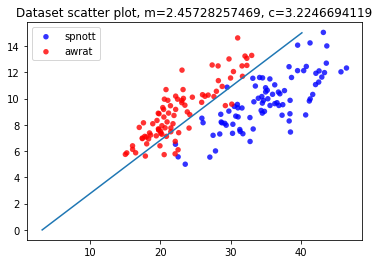

Boundary estimated using Monte Carlo Search


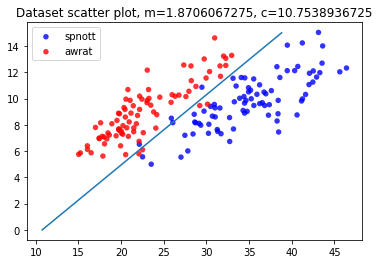

Boundary estimated using Gradient Descent


In [48]:
print(bestW)
m1 = -bestW[0, 1] / bestW[0, 0]
c1 = -bestW[0, 2] / bestW[0, 0]
plot_scatter_with_line(d_train, m1, c1)
print("Boundary estimated using Monte Carlo Search")


m2 = -W[1] / W[0]
c2 = -W[2] / W[0]
plot_scatter_with_line(d_train, m2, c2)
print("Boundary estimated using Gradient Descent")

#### Boundary estimated using gradient descent fits much better on the training data.